<a href="https://colab.research.google.com/github/yaolihua081/Stanford-CS06dataviz/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import altair as alt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys, platform, numpy as np, nltk, re, sklearn, pandas as pd, seaborn as sns, collections


from fbprophet import Prophet

import matplotlib.pyplot as plt

import matplotlib.style as style
style.use('fivethirtyeight')

In [ ]:
ls

sample_data/


In [ ]:
from google.colab import files
files.upload()

Saving United_States_COVIDNov9.csv to United_States_COVIDNov9.csv


{'United_States_COVIDNov9.csv': b'submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths\n01/22/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/23/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/24/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/25/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/26/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/27/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/28/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/29/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/30/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/31/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n02/01/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n02/02/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n02/03/2020,CO,0,,,0,,0,,,0,,03/

In [ ]:


#data = pd.read_csv('https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36/data')
#United_States_Covid=pd.read_csv('United_States_COVIDOct30.csv')
United_States_Covid=pd.read_csv('United_States_COVIDNov9.csv')
United_States_Covid.dropna()
United_States_Covid.head()

In [ ]:
United_States_Covid['month']=pd.DatetimeIndex(United_States_Covid['submission_date']).month

all_dates=United_States_Covid['submission_date'].unique()
#all_dates
United_States_Covid_modify=pd.concat([pd.DataFrame(United_States_Covid.groupby('submission_date')['new_death'].sum().values),
                                         pd.DataFrame(United_States_Covid.groupby('submission_date')['new_case'].sum().values)],axis=1)
United_States_Covid_modify.columns=['all_state_death','all_state_case']
United_States_Covid_modify['submission_date']=all_dates

United_States_Covid_modify

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


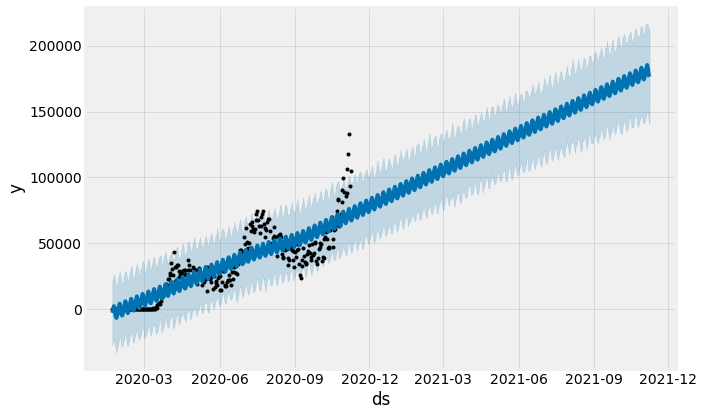

Text(0.5, 1.0, 'COVID-19 Cases Prediction')

Text(0.5, 25.200000000000003, 'date')

Text(25.200000000000003, 0.5, 'COVID-19 Cases')

Text(0, 0.5, 'COVID-19 Cases')

Text(0.5, 0, 'date')

Text(0.5, 1.0, 'Prediction of COVID-19 Cases')

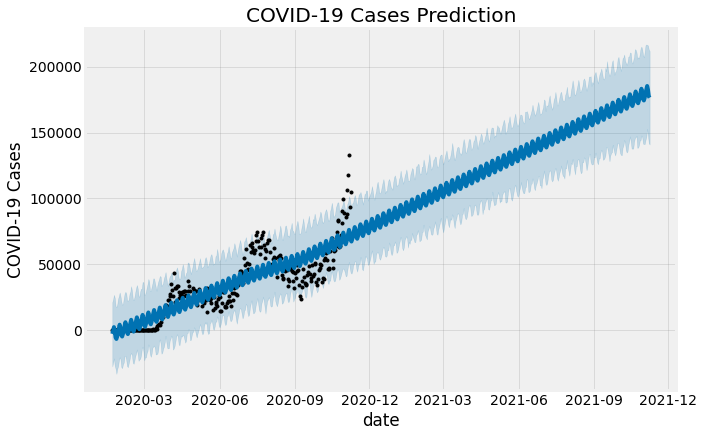

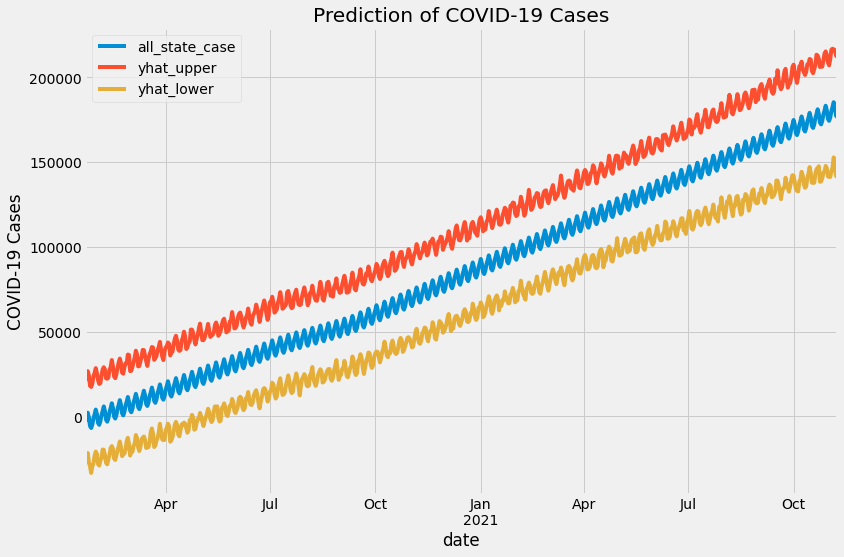

In [ ]:

United_States_Covid_modify_temp=United_States_Covid_modify


United_States_Covid_modify_temp.rename(columns={"submission_date": "ds", "all_state_case": 'y'}, inplace=True)
my_model = Prophet(interval_width=.95)
my_model.fit(United_States_Covid_modify_temp)
future_dates=my_model.make_future_dataframe(periods=365, freq='D', include_history=True)
forecast = my_model.predict(future_dates)
my_model.plot(forecast)
plt.title('COVID-19 Cases Prediction')
plt.xlabel('date')
plt.ylabel('COVID-19 Cases')
  #forecast.head()
forecast.rename(columns={"ds": "submission_date", "yhat": 'all_state_case'}, inplace=True)

forecast_modify_case=forecast[['submission_date','all_state_case','yhat_upper','yhat_lower']]
plt.style.use('fivethirtyeight')
ax = forecast_modify_case.set_index('submission_date').plot(figsize=(12, 8))
ax.set_ylabel('COVID-19 Cases')
ax.set_xlabel('date')
ax.set_title('Prediction of COVID-19 Cases')
plt.show()


,all_state_death,all_state_case,submission_date
0,0,1,01/22/2020
1,0,0,01/23/2020
2,0,1,01/24/2020
3,0,0,01/25/2020
4,0,3,01/26/2020
...,...,...,...
287,1141,106537,11/04/2020
288,1135,117988,11/05/2020
289,1211,132830,11/06/2020
290,1072,93811,11/07/2020


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0, 0.5, 'COVID-19 Deaths')

Text(0.5, 0, 'date')

Text(0.5, 1.0, 'Prediction of COVID-19 Deaths')

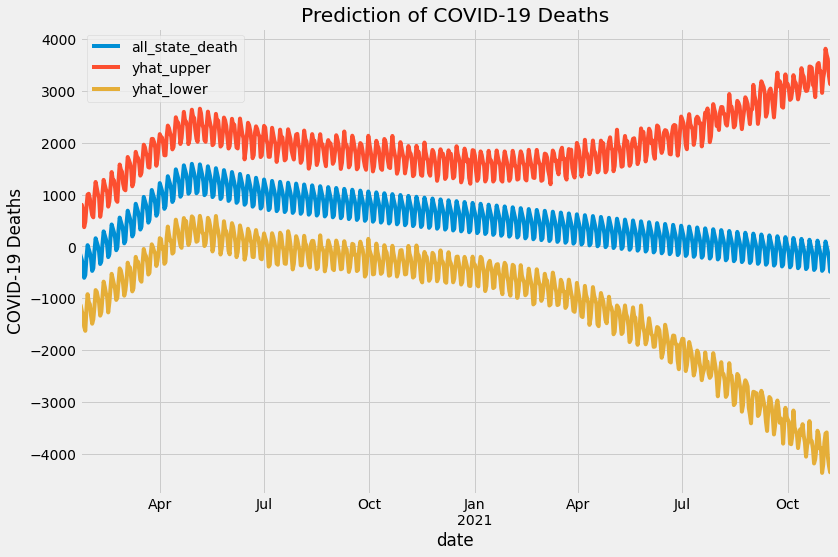

In [ ]:
#all_dates
United_States_Covid_modify=pd.concat([pd.DataFrame(United_States_Covid.groupby('submission_date')['new_death'].sum().values),
                                         pd.DataFrame(United_States_Covid.groupby('submission_date')['new_case'].sum().values)],axis=1)
United_States_Covid_modify.columns=['all_state_death','all_state_case']
United_States_Covid_modify['submission_date']=all_dates

United_States_Covid_modify
United_States_Covid_modify_temp=United_States_Covid_modify


United_States_Covid_modify_temp.rename(columns={"submission_date": "ds", "all_state_death": 'y'}, inplace=True)
my_model = Prophet(interval_width=.95)
my_model.fit(United_States_Covid_modify_temp)
future_dates=my_model.make_future_dataframe(periods=365, freq='D', include_history=True)
forecast = my_model.predict(future_dates)
  #forecast.head()
forecast.rename(columns={"ds": "submission_date", "yhat": 'all_state_death'}, inplace=True)

forecast_modify_death=forecast[['submission_date','all_state_death','yhat_upper','yhat_lower']]
plt.style.use('fivethirtyeight')
ax = forecast_modify_death.set_index('submission_date').plot(figsize=(12, 8))
ax.set_ylabel('COVID-19 Deaths')
ax.set_xlabel('date')
ax.set_title('Prediction of COVID-19 Deaths')
plt.show()

Text(0.5, 1.0, 'Prediction of COVID-19 for USA for the Next 365 Days')

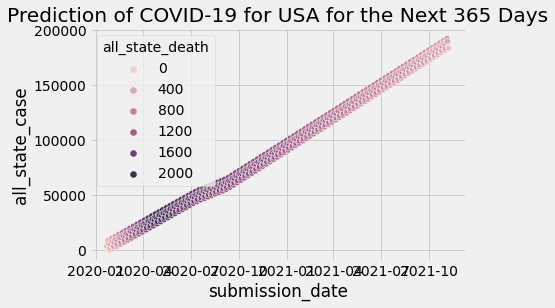

In [ ]:
figsize=(15,15)
sns.scatterplot(x='submission_date', y='all_state_case', hue='all_state_death', data=forecast_all)
#sns.scatterplot(x='Date', y='High', hue='Volume', data=AABA_data)
plt.title('Prediction of COVID-19 for USA for the Next 365 Days')
plt.show()

In [ ]:
#forecast_all['month']=pd.DatetimeIndex(forecast_all['submission_date']).month

forecast_all['all_state_case'] =forecast_all['all_state_case']-np.min(forecast_all['all_state_case'] )
forecast_all['all_state_death'] =forecast_all['all_state_death']-np.min(forecast_all['all_state_death'] )


In [ ]:
forecast_all
Covid_chart=alt.Chart(forecast_all,title='COVID-19 Prediction Cases for the next 365 days').mark_point().encode(
    x='month:N',
    y='all_state_case:Q',
    color='all_state_death:Q'
).interactive()
Covid_chart.save('Covid_chart.html')
Covid_chart
from google.colab import files
files.download('Covid_chart.html')

,submission_date,all_state_case,yhat_upper,yhat_lower,all_state_death,month
0,2020-01-22,3865.693624,19836.904479,-27948.648358,496.317599,1
1,2020-01-23,6208.492066,25462.892793,-24996.085565,421.490371,1
2,2020-01-24,9005.656539,28296.625620,-23253.424439,344.445631,1
3,2020-01-25,6237.922940,22641.415822,-24152.423503,235.816800,1
4,2020-01-26,1147.284001,18699.160969,-32172.202305,0.000000,1
...,...,...,...,...,...,...
652,2021-11-04,189410.855383,217620.404637,147700.585258,603.211892,11
653,2021-11-05,192243.124783,219424.466892,150221.014362,504.761797,11
654,2021-11-06,189510.496111,218707.517958,149306.540409,374.727612,11
655,2021-11-07,184454.962098,211518.684497,144676.794131,117.505458,11


alt.Chart(...)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
United_States_Covid['month']=pd.DatetimeIndex(United_States_Covid['submission_date']).month

all_dates=United_States_Covid['submission_date'].unique()
#all_dates
United_States_Covid_modify=pd.concat([pd.DataFrame(United_States_Covid.groupby('submission_date')['new_death'].sum().values),
                                         pd.DataFrame(United_States_Covid.groupby('submission_date')['new_case'].sum().values)],axis=1)
United_States_Covid_modify.columns=['all_state_death','all_state_case']
United_States_Covid_modify['submission_date']=all_dates

United_States_Covid_modify
United_States_Covid_modify['month']=pd.DatetimeIndex(United_States_Covid_modify['submission_date']).month
Covid_chart=alt.Chart(United_States_Covid_modify,title='COVID-19 Cases by Nov 9').mark_point().encode(
    x='month:N',
    y='all_state_case:Q',
    color='all_state_death:Q'
).interactive()
Covid_chart.save('Covid_chart.html')
Covid_chart
from google.colab import files
files.download('Covid_chart.html')

,all_state_death,all_state_case,submission_date
0,0,1,01/22/2020
1,0,0,01/23/2020
2,0,1,01/24/2020
3,0,0,01/25/2020
4,0,3,01/26/2020
...,...,...,...
287,1141,106537,11/04/2020
288,1135,117988,11/05/2020
289,1211,132830,11/06/2020
290,1072,93811,11/07/2020


alt.Chart(...)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>